In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_dataset=pd.read_csv("olist_customers_dataset.csv")
geo_dataset=pd.read_csv("olist_geolocation_dataset.csv")
order_items=pd.read_csv("olist_order_items_dataset.csv")
order_payments=pd.read_csv("olist_order_payments_dataset.csv")
order_review=pd.read_csv("olist_order_reviews_dataset.csv")
order_dataset=pd.read_csv("olist_orders_dataset.csv",date_parser=['order_purchase_timestamp',"order_approved_at","order_delivered_carrier_date"])
product_dataset=pd.read_csv("olist_products_dataset.csv").dropna()
seller_dataset=pd.read_csv("olist_sellers_dataset.csv")
category_translation=pd.read_csv("product_category_name_translation.csv")


In [3]:
#len(order_items["order_id"].unique().tolist())-len(order_items)
order_items[order_items["order_item_id"]==1]



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [4]:
# quitar articulos sin descripcion, fotos, meddias de product_dataset
producto_descartado=product_dataset[product_dataset["product_photos_qty"].isna()]["product_id"]
venta_productodescartado=order_items[order_items["product_id"].isin(producto_descartado)]

#print(len(venta_productodescartado)/len(order_items))
#print(order_items)
print(producto_descartado)

Series([], Name: product_id, dtype: object)


In [5]:

print(venta_productodescartado)

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


In [6]:
geo_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


# Entre los años de 2016 y 2018, ¿cuántos clientes tuvo Toppel? ¿Qué tanta venta aportó cada cliente? ¿Qué tanta reincidencias de ventas existió durante este periodo de tiempo? ¿En qué estado se encuentra la mayoría

                                  producto         %      acum
customer_unique_id                                            
4546caea018ad8c692964e3382debd19        21  0.000193  0.000193
c402f431464c72e27330a67f7b94d4fb        20  0.000184  0.000377
698e1cf81d01a3d389d96145f7fa6df8        20  0.000184  0.000561
0f5ac8d5c31de21d2f25e24be15bbffb        15  0.000138  0.000699
11f97da02237a49c8e783dfda6f50e8e        15  0.000138  0.000838
...                                    ...       ...       ...
f6339a9f9aa5046929d8a017570ec618         2  0.000018  0.208237
79a932ef36d3058a3bff9ed1a8d31b4c         2  0.000018  0.208255
4f983b76182eb91c0ca32b3b8752650c         2  0.000018  0.208274
7d27012b117e625faff580bec7cdf2e1         2  0.000018  0.208292
f5ee9c315933044916faecd8e0fae4e2         2  0.000018  0.208311

[9356 rows x 3 columns]


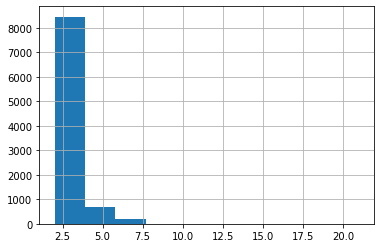

In [7]:
#order_dataset["order_delivered_carrier_date"]
order_dataset['order_purchase_timestamp'] = pd.to_datetime(order_dataset['order_purchase_timestamp']).dt.date
clients_2016= order_dataset.merge(customer_dataset[["customer_id","customer_unique_id","customer_state"]],on="customer_id")
clients_2016["año"]=pd.DatetimeIndex(clients_2016["order_purchase_timestamp"]).year
clients_2016= clients_2016.drop_duplicates("customer_unique_id")
ventas_2016=order_items[["order_id","product_id"]].merge(clients_2016,on="order_id")
ventas_2016["producto"]=1
state_2016= ventas_2016.groupby("customer_state").sum()["producto"].reset_index().sort_values("producto",ascending=False)
ventas_2016=ventas_2016.groupby("customer_unique_id").sum()[["producto"]].sort_values("producto",ascending=False)
total_ventas=ventas_2016["producto"].sum()
ventas_2016["%"]=ventas_2016["producto"]/total_ventas
ventas_2016["acum"]=ventas_2016["%"].cumsum()
mayoria=ventas_2016[ventas_2016["acum"]<=.709]
#estado de mayor venta
#print(state_2016)
#print(total_ventas)
#Clientes que tuvo Toppel?
#print(len(clients_2016))
#que tante venta aporto cada cliente?
#print(ventas_2016)
# 62780 hacen el 70%  de los clientes hacen el de la compras
#print(mayoria)
#reincidencias durante los 3 años
reincidencias=ventas_2016[ventas_2016["producto"]>=2]
#print(len(reincidencias)/total_ventas)
#solo el 8.6% 
print(reincidencias)
reincidencias.producto.hist()


## revisar que tantas ordenes hizo el cliente? cuantas ordenes distintas hizo?.

## revisar clientes que compran productos mas caros y que compran productos mas baratos.


# ¿Cuántos proveedores tienen convenio con Toppel? ¿Qué tantos productos y categorías manejan cada proveedor? ¿Qué tan bien calificados se encuentran los productos de estos proveedores?
¿Existe alguna relación importante entre el proveedor y el costo de flete al que se incurre cuando se envía la mercancía?

3095
                             seller_id  review_score  # categorias unitarias  \
2208  4a3ca9315b744ce9f8e9374361493884      3.781621                       7   
2174  cca3071e3e9bb7d12640c9fbe2301306      3.803048                       6   
1645  d91fb3b7d041e83b64a00a3edfb37e4f      4.076106                       6   
1607  fa1c13f2614d7b5c4749cbc52fecda94      4.109147                       5   
1699  7142540dd4c91e2237acb7e911c4eba2      4.041551                       2   
...                                ...           ...                     ...   
1408  8d956fec2e4337affcb520f56fd8cbfd      4.208511                      13   
2269  ca3bd7cd9f149df75950150d010fe4a2      3.724638                       2   
1546  db4350fd57ae30082dec7acbaacc17f9      4.136364                       5   
2013  1336efc61c316ddf92c899eb817f7cae      3.923077                       8   
1081  8ae520247981aa06bc94abddf5f46d34      4.379310                       4   

      # productos unitarios  
2208

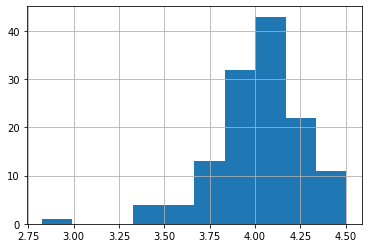

In [8]:
#cuantos clientes tiene toppel?
print(len(order_items["seller_id"].unique()))
#print(product_dataset)
productos_provedor= seller_dataset.merge(order_items[["seller_id","product_id"]], on= "seller_id")
productos_provedor=productos_provedor.merge(product_dataset[["product_id","product_category_name"]],on="product_id",how="outer")
productos_provedor["#"]= 1
#print(productos_provedor)
#print(productos_provedor[productos_provedor["product_category_name"].isna()])
numero_productos=productos_provedor.groupby(["seller_id","product_id"])["#"].sum().reset_index()
calif_prov= numero_productos.drop("#",axis=1)
numero_productos["# productos unitarios"]=1
numero_productos=numero_productos.groupby("seller_id").sum()["# productos unitarios"].reset_index().sort_values("# productos unitarios", ascending=False)
#numero de productos que tiene cada cliente?
#print(numero_productos)
numero_categoria=productos_provedor.groupby(["seller_id","product_category_name"]).sum().reset_index()
numero_categoria["# categorias unitarias"]=1
numero_categoria=numero_categoria.groupby("seller_id").sum()["# categorias unitarias"].reset_index().sort_values("# categorias unitarias", ascending=False)
#numero de categorias que tiene cada cliente?
#print(numero_categoria)
#calificaciones de productos por proveedor.
calif_prov=calif_prov.merge(order_items[["product_id","order_id"]],on="product_id")
calif_prov=calif_prov.merge(order_review[["review_score","order_id"]],on="order_id")
calif_prov=calif_prov.groupby("seller_id").mean()["review_score"].reset_index().sort_values("review_score",ascending=False)
#calif_prov
tabla_resp=calif_prov.merge(numero_categoria,on="seller_id")
tabla_resp=tabla_resp.merge(numero_productos,on="seller_id")
tabla_resp=tabla_resp.sort_values("# productos unitarios",ascending=False)
tabla_resp= tabla_resp[tabla_resp["# productos unitarios"]>=50]
print(tabla_resp)
tabla_resp["review_score"].hist()
### cual es el top 5 proveedor que mas vende

# correlacion entre califiacion de proveedor y si hay mas venta o menos venta.
# diagraga de dispersion.
# 


## Análisis del comportamiento de la venta de productos
¿Qué tantos productos maneja esta empresa? ¿Qué tantos productos tienen las categorías de productos? ¿Cuáles son las categorías de productos que representan el mayor porcentaje de venta? ¿Cuál es la distribución de precios que maneja cada categoría; es decir, cuáles son las categorías más baratas y las más caras?
Aunado a lo anterior, ¿cómo se han comportado la serie de tiempo de las ventas por categoría? ¿Ha existido un cambio en la mezcla de los productos que mejor vende Toppel?
¿Los mismos productos tienen una variación importante en el precio a través del tiempo? ¿Existen proveedores que tengan precios más caros que otros?

In [9]:
#¿que tantos productos Maneja la empresa?
len(product_dataset["product_id"].unique())
#¿Qué tantos productos tienen las categorías de productos?
producto_cat= product_dataset
producto_cat["#"]= 1
producto_cat= producto_cat.groupby(["product_category_name"]).sum()["#"].reset_index().sort_values("#",ascending=False)
print(producto_cat)

            product_category_name     #
13                cama_mesa_banho  3029
32                  esporte_lazer  2867
54               moveis_decoracao  2657
11                   beleza_saude  2444
72          utilidades_domesticas  2335
..                            ...   ...
15                casa_conforto_2     5
37  fashion_roupa_infanto_juvenil     5
60                       pc_gamer     3
67             seguros_e_servicos     2
17              cds_dvds_musicais     1

[73 rows x 2 columns]


In [10]:
product_dataset
order_items
categoria_venta= order_items.merge(product_dataset[["product_id","product_category_name"]],on="product_id")
categoria_venta["#"]= 1
categoria_venta=categoria_venta.groupby("product_category_name").sum()["#"].reset_index().sort_values("#",ascending=False)
categoria_venta["%"]=categoria_venta["#"]/categoria_venta["#"].sum()
categoria_venta["acum"]=categoria_venta["%"].cumsum()
categoria_venta

,product_category_name,#,%,acum
13,cama_mesa_banho,11115,0.100094,0.100094
11,beleza_saude,9670,0.087081,0.187175
32,esporte_lazer,8641,0.077815,0.264989
54,moveis_decoracao,8334,0.075050,0.340039
44,informatica_acessorios,7827,0.070484,0.410524
...,...,...,...,...
17,cds_dvds_musicais,14,0.000126,0.999703
46,la_cuisine,14,0.000126,0.999829
60,pc_gamer,9,0.000081,0.999910
37,fashion_roupa_infanto_juvenil,8,0.000072,0.999982


order_items

In [11]:
venta_producto=order_items
venta_producto["venta_uni"]= 1
venta_producto=venta_producto.groupby("product_id").sum()["venta_uni"].reset_index().sort_values("venta_uni",ascending=False)
#print(venta_producto)
price_cat= product_dataset.merge(order_items[["price","product_id"]],on="product_id")
price_cat= price_cat.groupby(["product_category_name","product_id"]).mean()["price"].reset_index()
#price_cat=price_cat[price_cat["product_id"]=="368c6c730842d78016ad823897a372db"]
#product_dataset["product_id"]
#price_cat[price_cat["product_category_name"]=="casa_conforto_2"].plot.barh(x="product_id")
price_cat=price_cat.groupby(["product_category_name"]).mean()["price"].reset_index().sort_values("price",ascending=False)
price_cat=price_cat.merge(producto_cat,on= "product_category_name")
price_cat=price_cat.rename(columns={"#":"numero_articulos"})
price_cat= price_cat.merge(categoria_venta[["product_category_name","#"]],on="product_category_name")
price_cat=price_cat.rename(columns={"#":"venta_articulos"})
#price_cat.plot.barh()
price_cat[price_cat["venta_articulos"]>=0]
price_cat["venta_articulos"].sum()

111046

In [116]:
ventas_cat=order_dataset.merge(order_items,on="order_id")
ventas_cat=ventas_cat.drop(["order_id","freight_value","shipping_limit_date","customer_id","order_delivered_customer_date","order_status","order_estimated_delivery_date","order_approved_at","order_delivered_carrier_date","seller_id","price"],axis=1)
ventas_cat=ventas_cat.merge(product_dataset[["product_id","product_category_name"]],on= "product_id")
ventas_cat["year"]= pd.DatetimeIndex(ventas_cat["order_purchase_timestamp"]).year
ventas_cat["month"]= pd.DatetimeIndex(ventas_cat["order_purchase_timestamp"]).month
#print(ventas_cat.sort_values("month",ascending=False))
ventas_cat["time"]=ventas_cat["year"]+(ventas_cat["month"]-1)/12
#print(ventas_cat.sort_values("month",ascending=False))
#print(ventas_cat[["month","year"]].sort_values("year",ascending=True))
ventas_cat= ventas_cat.groupby(["time","product_category_name"]).sum()["venta_uni"].reset_index()
apariciones=ventas_cat["product_category_name"].value_counts().reset_index()
apariciones=apariciones.rename(columns={"index":"product_category_name","product_category_name":"apariciones"})
ventas_cat=ventas_cat.merge(apariciones,on="product_category_name")
#print(ventas_cat)
#ventas_cat=ventas_cat[ventas_cat["apariciones"]>=21]
#print(ventas_cat[ventas_cat["product_category_name"]=="seguros_e_servicos"])#=ventas_cat[ventas_cat["product_category_name"]=="cama_mesa_banho"]
#sns.lineplot(x="time",y="venta_uni", data= ventas_cat[ventas_cat["product_category_name"]=="eletroportateis"])
#apariciones

      order_purchase_timestamp  order_item_id  \
50630               2017-12-28              1   
71302               2017-12-27              2   
17718               2017-12-23              1   
71369               2017-12-17              1   
71364               2017-12-10              1   
...                        ...            ...   
22749               2018-01-19              1   
59522               2018-01-05              1   
59510               2018-01-07              1   
59507               2018-01-03              1   
17310               2018-01-10              1   

                             product_id  venta_uni   product_category_name  \
50630  e7d26dd6742baca292020c158e6720c3          1        malas_acessorios   
71302  056d012d264624accb7f73d31caee034          1         cama_mesa_banho   
17718  4e0d01d5e5e4bd454e71e7cd1491c052          1            beleza_saude   
71369  88a82488ded06b62a95df35c384cabfb          1           esporte_lazer   
71364  8b502ca34e28d3

In [13]:
apariciones=ventas_cat["product_category_name"].value_counts().reset_index()
apariciones=apariciones.rename(columns={"index":"product_category_name","product_category_name":"apariciones"})
apariciones

,product_category_name,apariciones
0,fashion_bolsas_e_acessorios,22
1,beleza_saude,22
2,telefonia,22
3,moveis_decoracao,22
4,ferramentas_jardim,21
...,...,...
68,pc_gamer,6
69,artes_e_artesanato,6
70,cds_dvds_musicais,6
71,portateis_cozinha_e_preparadores_de_alimentos,3


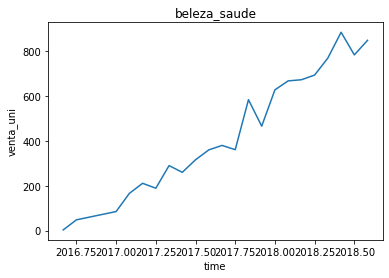

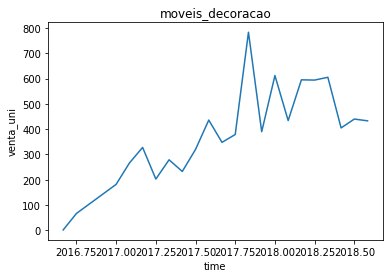

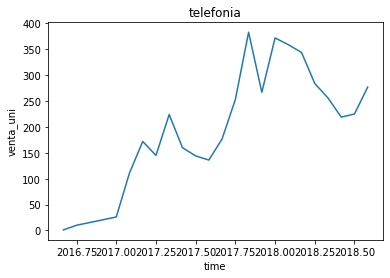

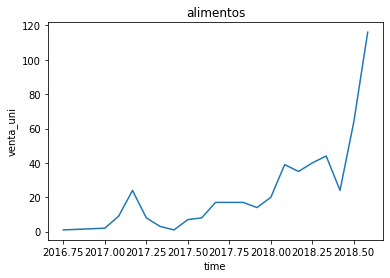

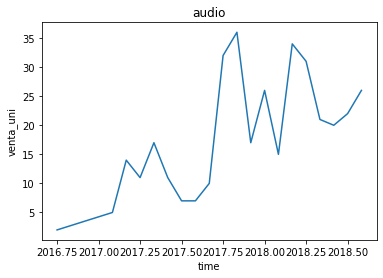

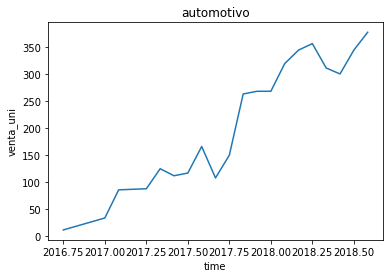

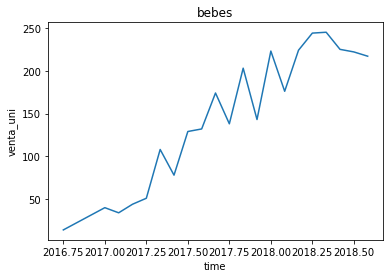

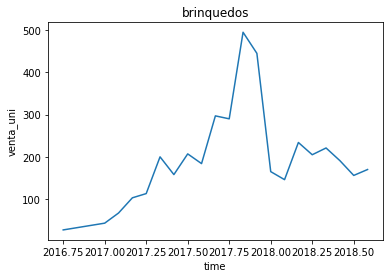

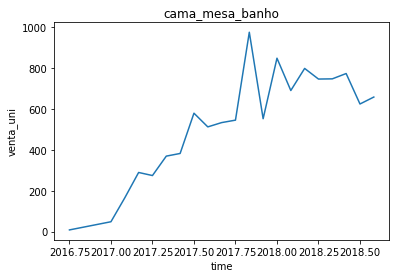

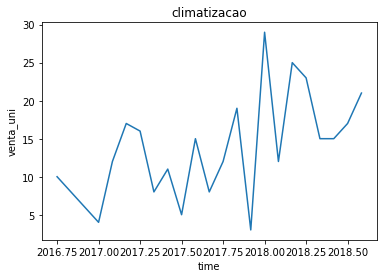

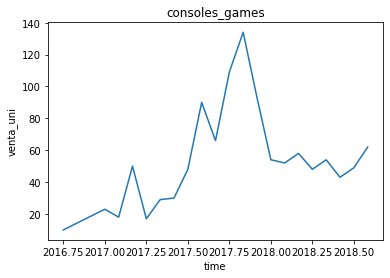

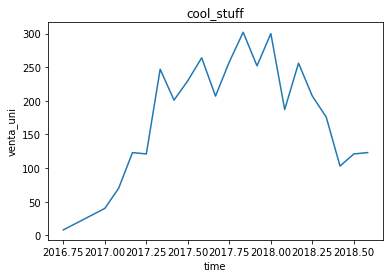

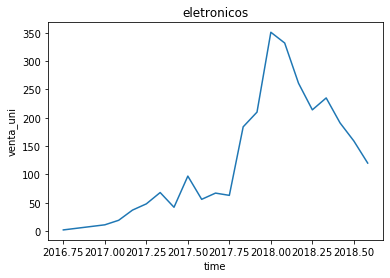

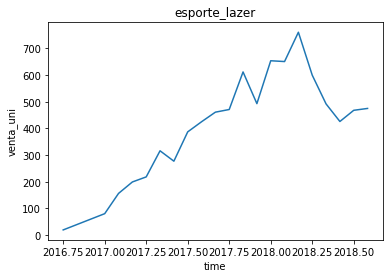

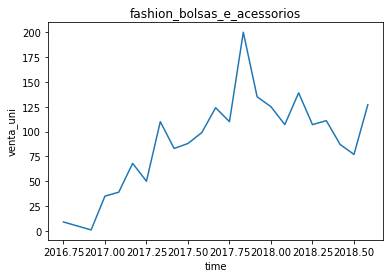

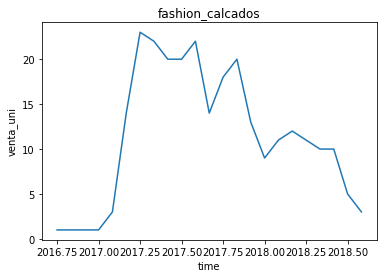

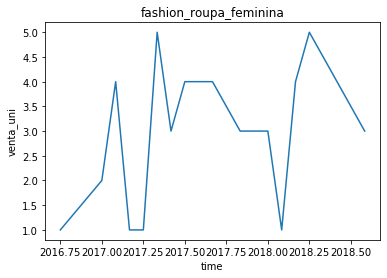

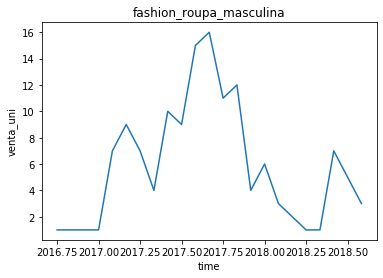

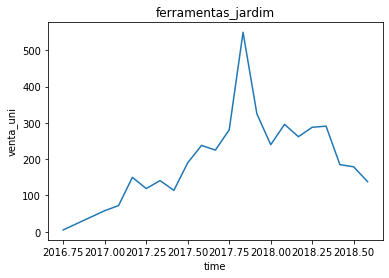

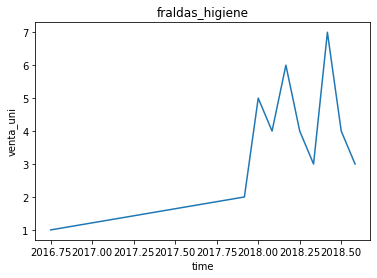

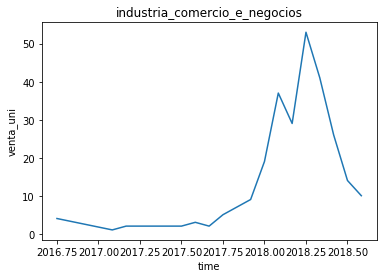

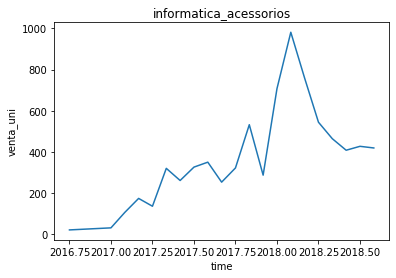

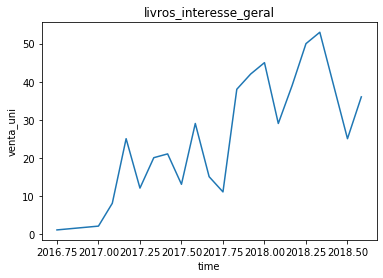

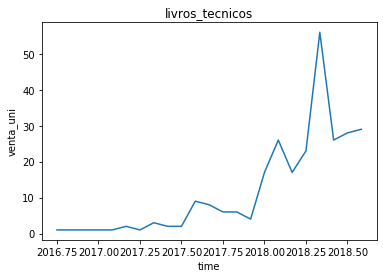

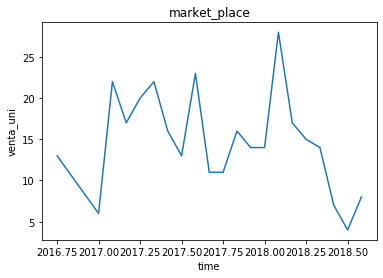

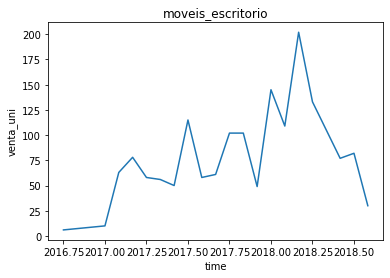

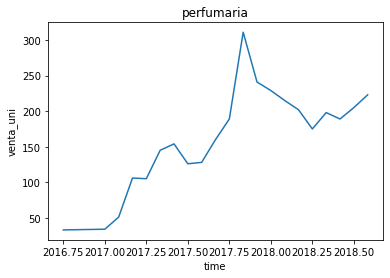

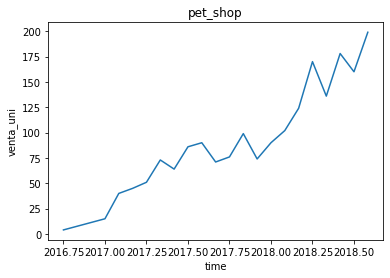

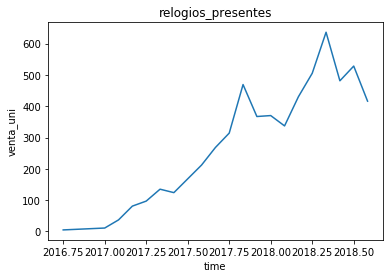

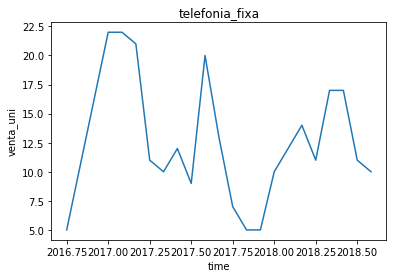

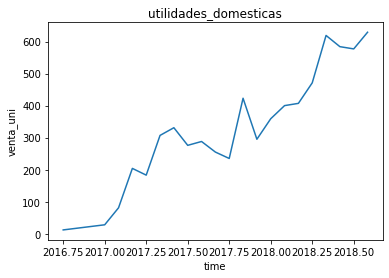

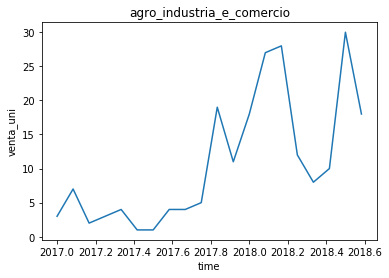

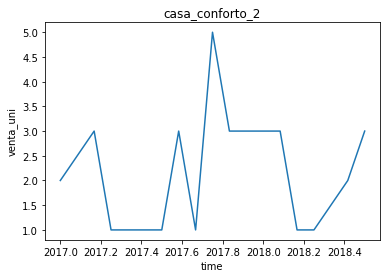

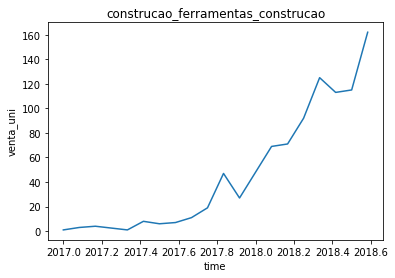

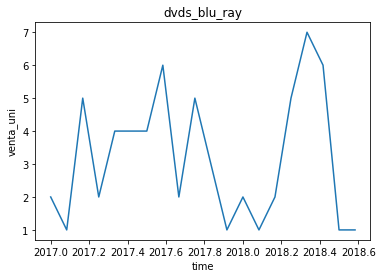

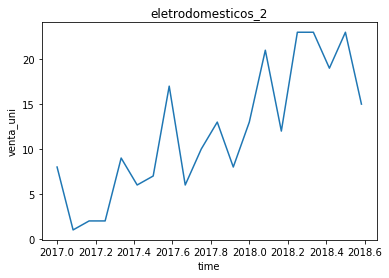

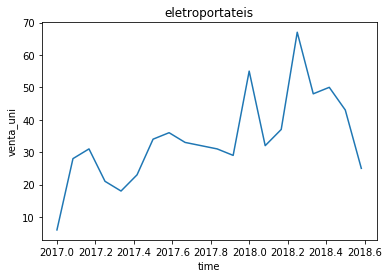

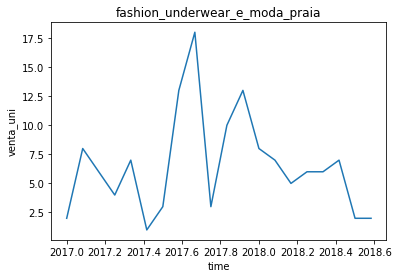

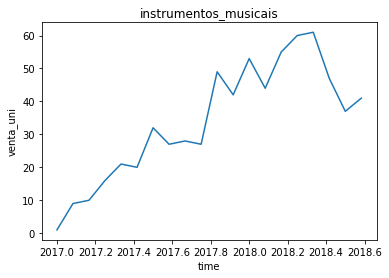

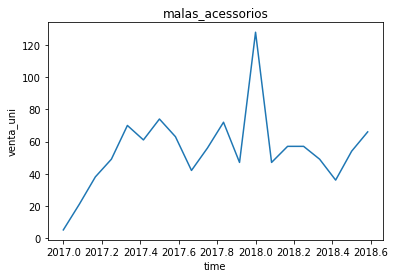

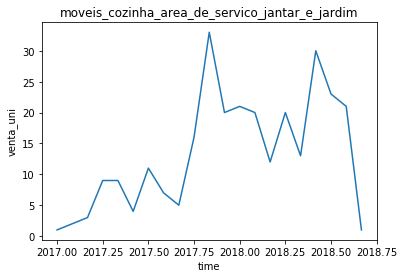

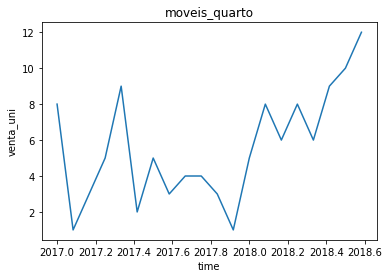

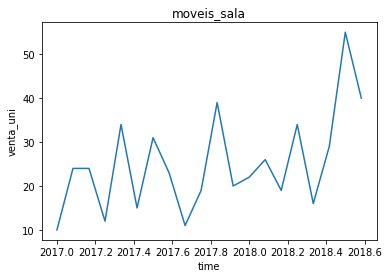

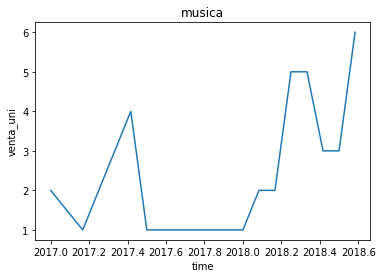

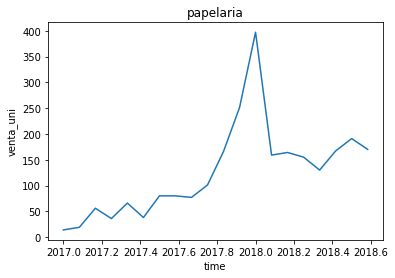

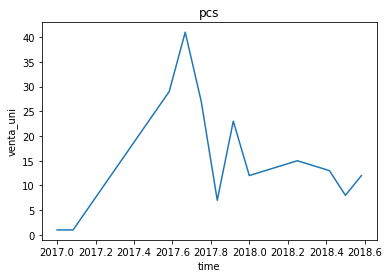

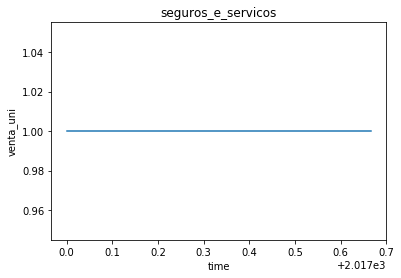

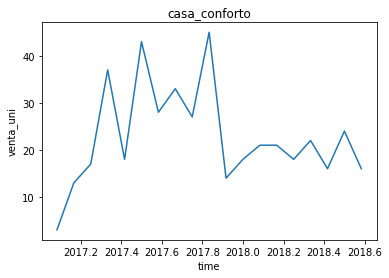

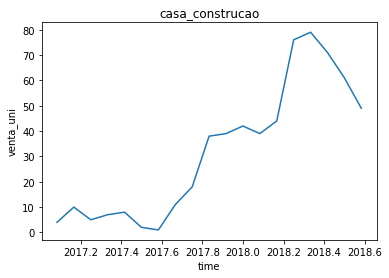

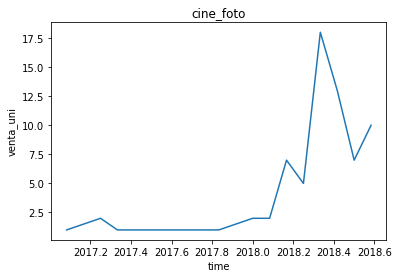

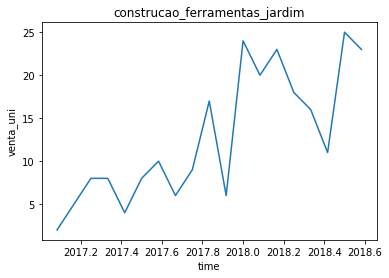

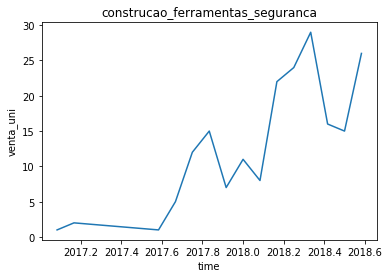

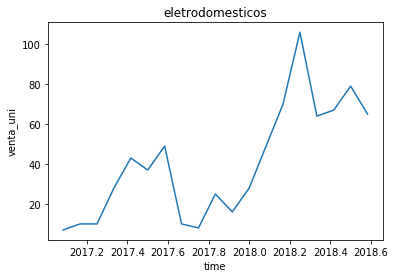

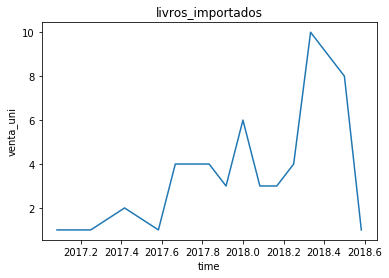

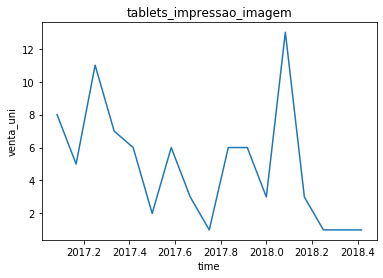

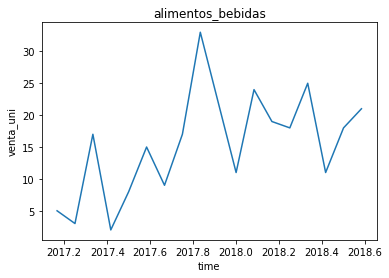

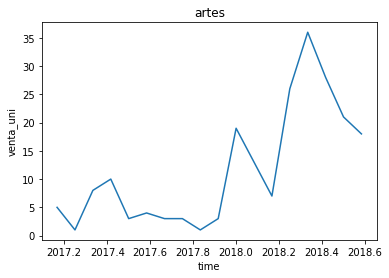

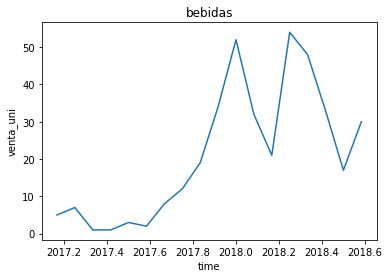

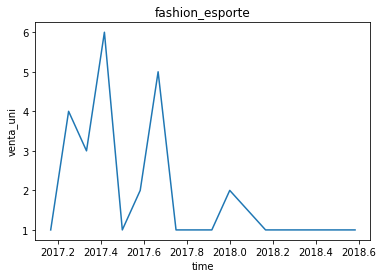

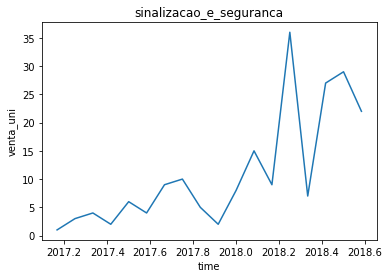

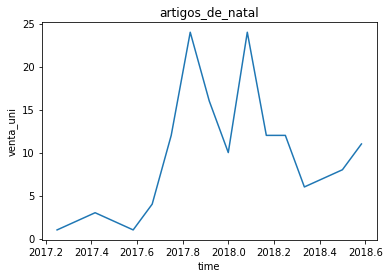

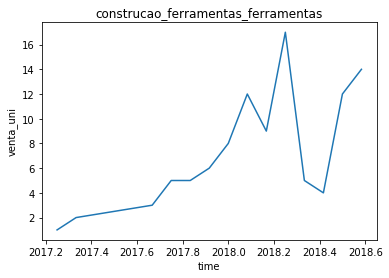

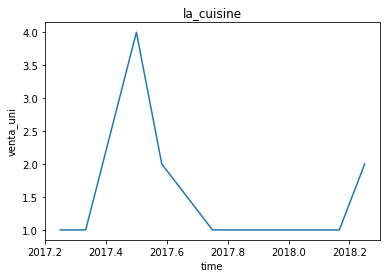

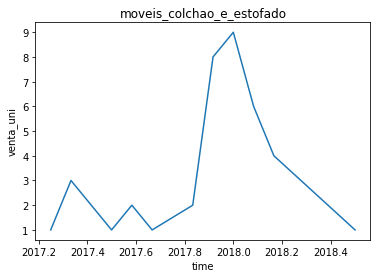

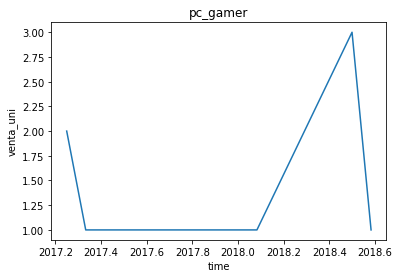

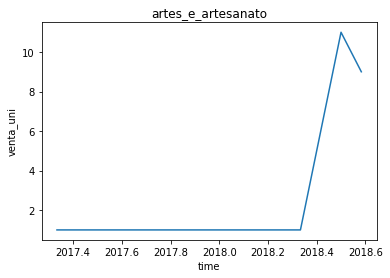

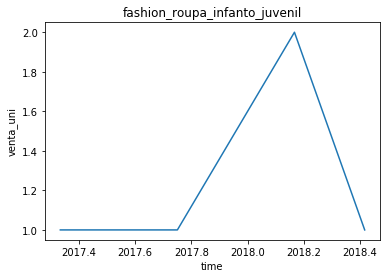

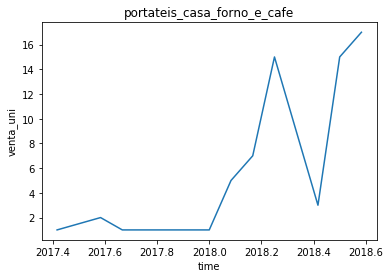

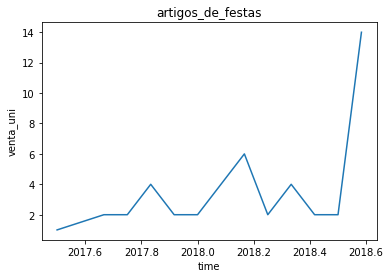

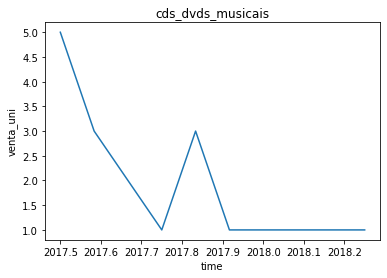

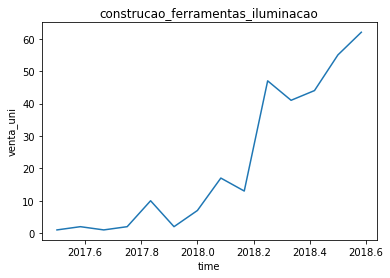

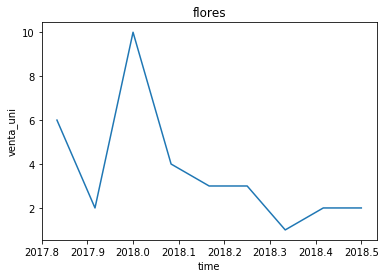

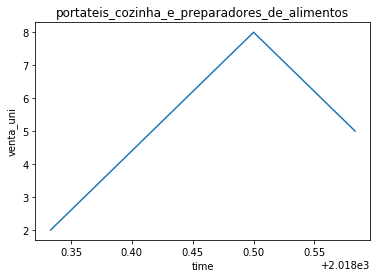

In [111]:
categorias= ventas_cat["product_category_name"].unique()
#print(ventas_cat[v])
for cat in categorias:
    sns.lineplot(x="time",y="venta_uni", data= ventas_cat[(ventas_cat["product_category_name"]==cat) ] ).set_title(cat)
    plt.show()


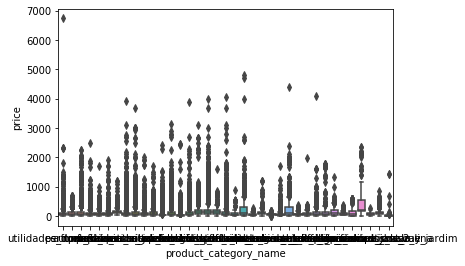

In [81]:
product_dataset
order_items
order_dataset
price_range= order_dataset[["order_id","order_purchase_timestamp"]].merge(order_items[["order_id","product_id","price"]],on="order_id")
price_range=price_range.merge(product_dataset[["product_id","product_category_name"]],on="product_id")
price_range["year"]= pd.DatetimeIndex(price_range["order_purchase_timestamp"]).year
#price_range= price_range.groupby(["year","product_category_name","product_id"])
price_range=price_range.merge(apariciones,on="product_category_name")
sns.boxplot(x="product_category_name", y="price",data=price_range[price_range["apariciones"]>=20]);
plt.show()

In [110]:
top2016=price_range[price_range["year"]==2016]
top2017=price_range[price_range["year"]==2017]
top2018=price_range[price_range["year"]==2018]


top_sellers16=top2018["product_id"].value_counts().reset_index()
top_sellers16.head(20)

,index,product_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,413
1,3dd2a17168ec895c781a9191c1e95ad7,274
2,53b36df67ebb7c41585e8d54d6772e08,257
3,d1c427060a0f73f6b889a5c7c61f2ac4,247
4,422879e10f46682990de24d770e7f83d,208
5,a62e25e09e05e6faf31d90c6ec1aa3d1,200
6,368c6c730842d78016ad823897a372db,190
7,389d119b48cf3043d311335e499d9c6b,173
8,e53e557d5a159f5aa2c5e995dfdf244b,170
9,bb50f2e236e5eea0100680137654686c,158


In [88]:
pr

array(['87285b34884572647811a353c7ac498a',
       'be021417a6acb56b9b50d3fd2714baa8',
       'a5a0e71a81ae65aa335e71c06261e260', ...,
       'eacb104882d39ffb53140b1d1860a7c3',
       '6c7a0a349ad11817745e3ad58abd5c79',
       '8db75af9aed3315374db44d7860e25da'], dtype=object)

In [119]:
order_dataset.sort_values("order_purchase_timestamp")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29,NaN,NaN,NaN,2018-10-15 00:00:00
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01,NaN,NaN,NaN,2018-10-23 00:00:00
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03,NaN,NaN,NaN,2018-10-16 00:00:00
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16,NaN,NaN,NaN,2018-11-12 00:00:00
